In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
import datetime

# Assuming you have a CSV file called 'filename.csv' in the current directory

# folder_path = "/Users/keerthidubbala/Desktop/July_2023_mHealthapps"  # Specify the folder path where your CSV files are located
file_extensions = [".csv"]  # Specify the file extensions of the files you want to load
# os.chdir(folder_path)  # Set the current working directory to the folder path

# Read the CSV file into a DataFrame
ihd_df = pd.read_csv('IHD_apple_to_plot.csv')
ihd_df["disease"] = "IHD"

In [3]:
# Replace the second dot and the following number
ihd_df['required_os_num'] = ihd_df['required_os'].str.replace(r'\.(?=.*\.)', '', regex=True).astype(float)
# Replace the second dot and the following number
ihd_df['released_year'] = ihd_df['released'].str[:4].astype(int)
ihd_df['updated_year'] = ihd_df['updated'].str[:4].astype(int)

In [4]:
ihd_df['description_length'] = ihd_df['description'].apply(len)


In [5]:
column_list = ihd_df.columns.tolist()
print(column_list)


['id', 'title', 'released', 'updated', 'required_os', 'required_os_2021', 'size', 'size_2021', 'score', 'score_2021', 'reviews', 'reviews_2021', 'currency_2021', 'category', 'genres', 'languages', 'price', 'price_2021', 'currency', 'description', 'description_length', 'required_os.1', 'disease', 'required_os_num', 'released_year', 'updated_year']


In [6]:
ihd_df['released_year']

0       2014
1       2016
2       2016
3       2012
4       2020
        ... 
1676    2015
1677    2020
1678    2020
1679    2020
1680    2018
Name: released_year, Length: 1681, dtype: int64

In [7]:
import matplotlib.pyplot as plt

# Enable interactive mode to prevent figures from displaying immediately
plt.ioff()

# Set the savefig directory and format
savefig_dir = '/Users/keerthidubbala/Desktop/July_2023_mHealthapps/IHD_paper1_plots'
savefig_format = 'png'

# Define a function to save the current figure
def save_figure(fig_name):
    fig_path = f'{savefig_dir}/{fig_name}.{savefig_format}'
    plt.savefig(fig_path, format=savefig_format)
    print(f'Saved figure: {fig_path}')

# Disable interactive mode at the end of the notebook
def disable_interactive_mode():
    plt.close('all')
    plt.ion()

# Call the disable_interactive_mode function at the end of the notebook
import atexit
atexit.register(disable_interactive_mode)

## Correlation analysis
## Correlation without ratings and reviews
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (if not already loaded)
# all_ihd_df = pd.read_csv('your_data.csv')

#----------------------- organising different columns---------


# Replace 'Varies with device' with NaN values in the 'size' column
ihd_df['size'] = ihd_df['size'].replace('Varies with device', np.nan)

def convert_to_millions(size):
    if pd.isna(size):
        return size
    return size / 1000000  # Convert size to millions

# Apply the function to the 'size' column
ihd_df['size_mb'] = ihd_df['size'].apply(convert_to_millions)

#---------------------------released year, updated year


# X = ihd_df[['released_year', 'updated_year', 'size_mb', 'required_os_num', 'price', 'score', 'description_length', 'genres']]
# 


In [8]:
ihd_df

,id,title,released,updated,required_os,required_os_2021,size,size_2021,score,score_2021,...,price_2021,currency,description,description_length,required_os.1,disease,required_os_num,released_year,updated_year,size_mb
0,com.BillDirkes.QuickEM,QuickEM,2014-11-08T06:38:46Z,2023-03-05T01:52:44Z,13.0,NaN,24338432,NaN,0.0,NaN,...,NaN,INR,QuickEM is a rapid bedside reference designed ...,945,13.0,IHD,13.0,2014,2023,24.338432
1,com.motusglobal.motusqb,PULSE QB,2016-06-18T19:05:28Z,2021-08-30T12:58:38Z,10.0,NaN,163262464,NaN,0.0,NaN,...,NaN,INR,PULSE is the heartbeat of your throwing routin...,1430,10.0,IHD,10.0,2016,2021,163.262464
2,com.manuelvicnt.Mindfulness,Present Mind - Mindfulness,2016-12-13T02:34:10Z,2021-02-15T14:31:32Z,14.3,14.3,100043776,100043776.0,0.0,0.00,...,0.00,INR,This Present Mind - Mindfulness App is a great...,1682,14.3,IHD,14.3,2016,2021,100.043776
3,Desbrina.Medicine-Tracker-Lite,Med Track Lite,2012-09-07T14:34:24Z,2017-11-01T13:29:11Z,10.3,10.3,17192960,17192960.0,0.0,2.00,...,0.00,INR,An app for tracking your medicine list. Notifi...,70,10.3,IHD,10.3,2012,2017,17.192960
4,com.wingluntong.domesticfungshui,Fengshui FortuneTeller,2020-06-10T07:00:00Z,2021-09-27T19:31:01Z,13.0,13.0,17435648,17435648.0,0.0,3.75,...,0.00,INR,Watch Fengshui for your house yourself. And yo...,3158,13.0,IHD,13.0,2020,2021,17.435648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,com.ewerk.happiness,I-Positivity,2015-06-12T12:31:13Z,2016-02-15T22:02:15Z,8.0,8.0,70074368,70074368.0,0.0,3.00,...,0.00,INR,Have you recently experienced a heart attack? ...,1347,8.0,IHD,8.0,2015,2016,70.074368
1677,com.emedy.EMDDx,EMDDx,2020-08-19T07:00:00Z,2020-08-19T11:41:13Z,9.0,9.0,15868928,15868928.0,0.0,5.00,...,9.99,INR,From common chief complaints such as chest pai...,182,9.0,IHD,9.0,2020,2020,15.868928
1678,greenpea.SeniorFitness,Shoulder Exercises For Seniors,2020-03-27T07:00:00Z,2020-03-27T14:53:04Z,13.0,13.0,107303936,107303936.0,0.0,5.00,...,0.00,INR,According the journal of Current Opinion in Rh...,1535,13.0,IHD,13.0,2020,2020,107.303936
1679,greenpea.BackPainExercisesForSeniors,Low Back Exercises For Seniors,2020-04-01T07:00:00Z,2020-04-01T18:59:58Z,13.0,13.0,95583232,95583232.0,0.0,4.00,...,0.00,INR,According to the journal of Current Opinion in...,1628,13.0,IHD,13.0,2020,2020,95.583232


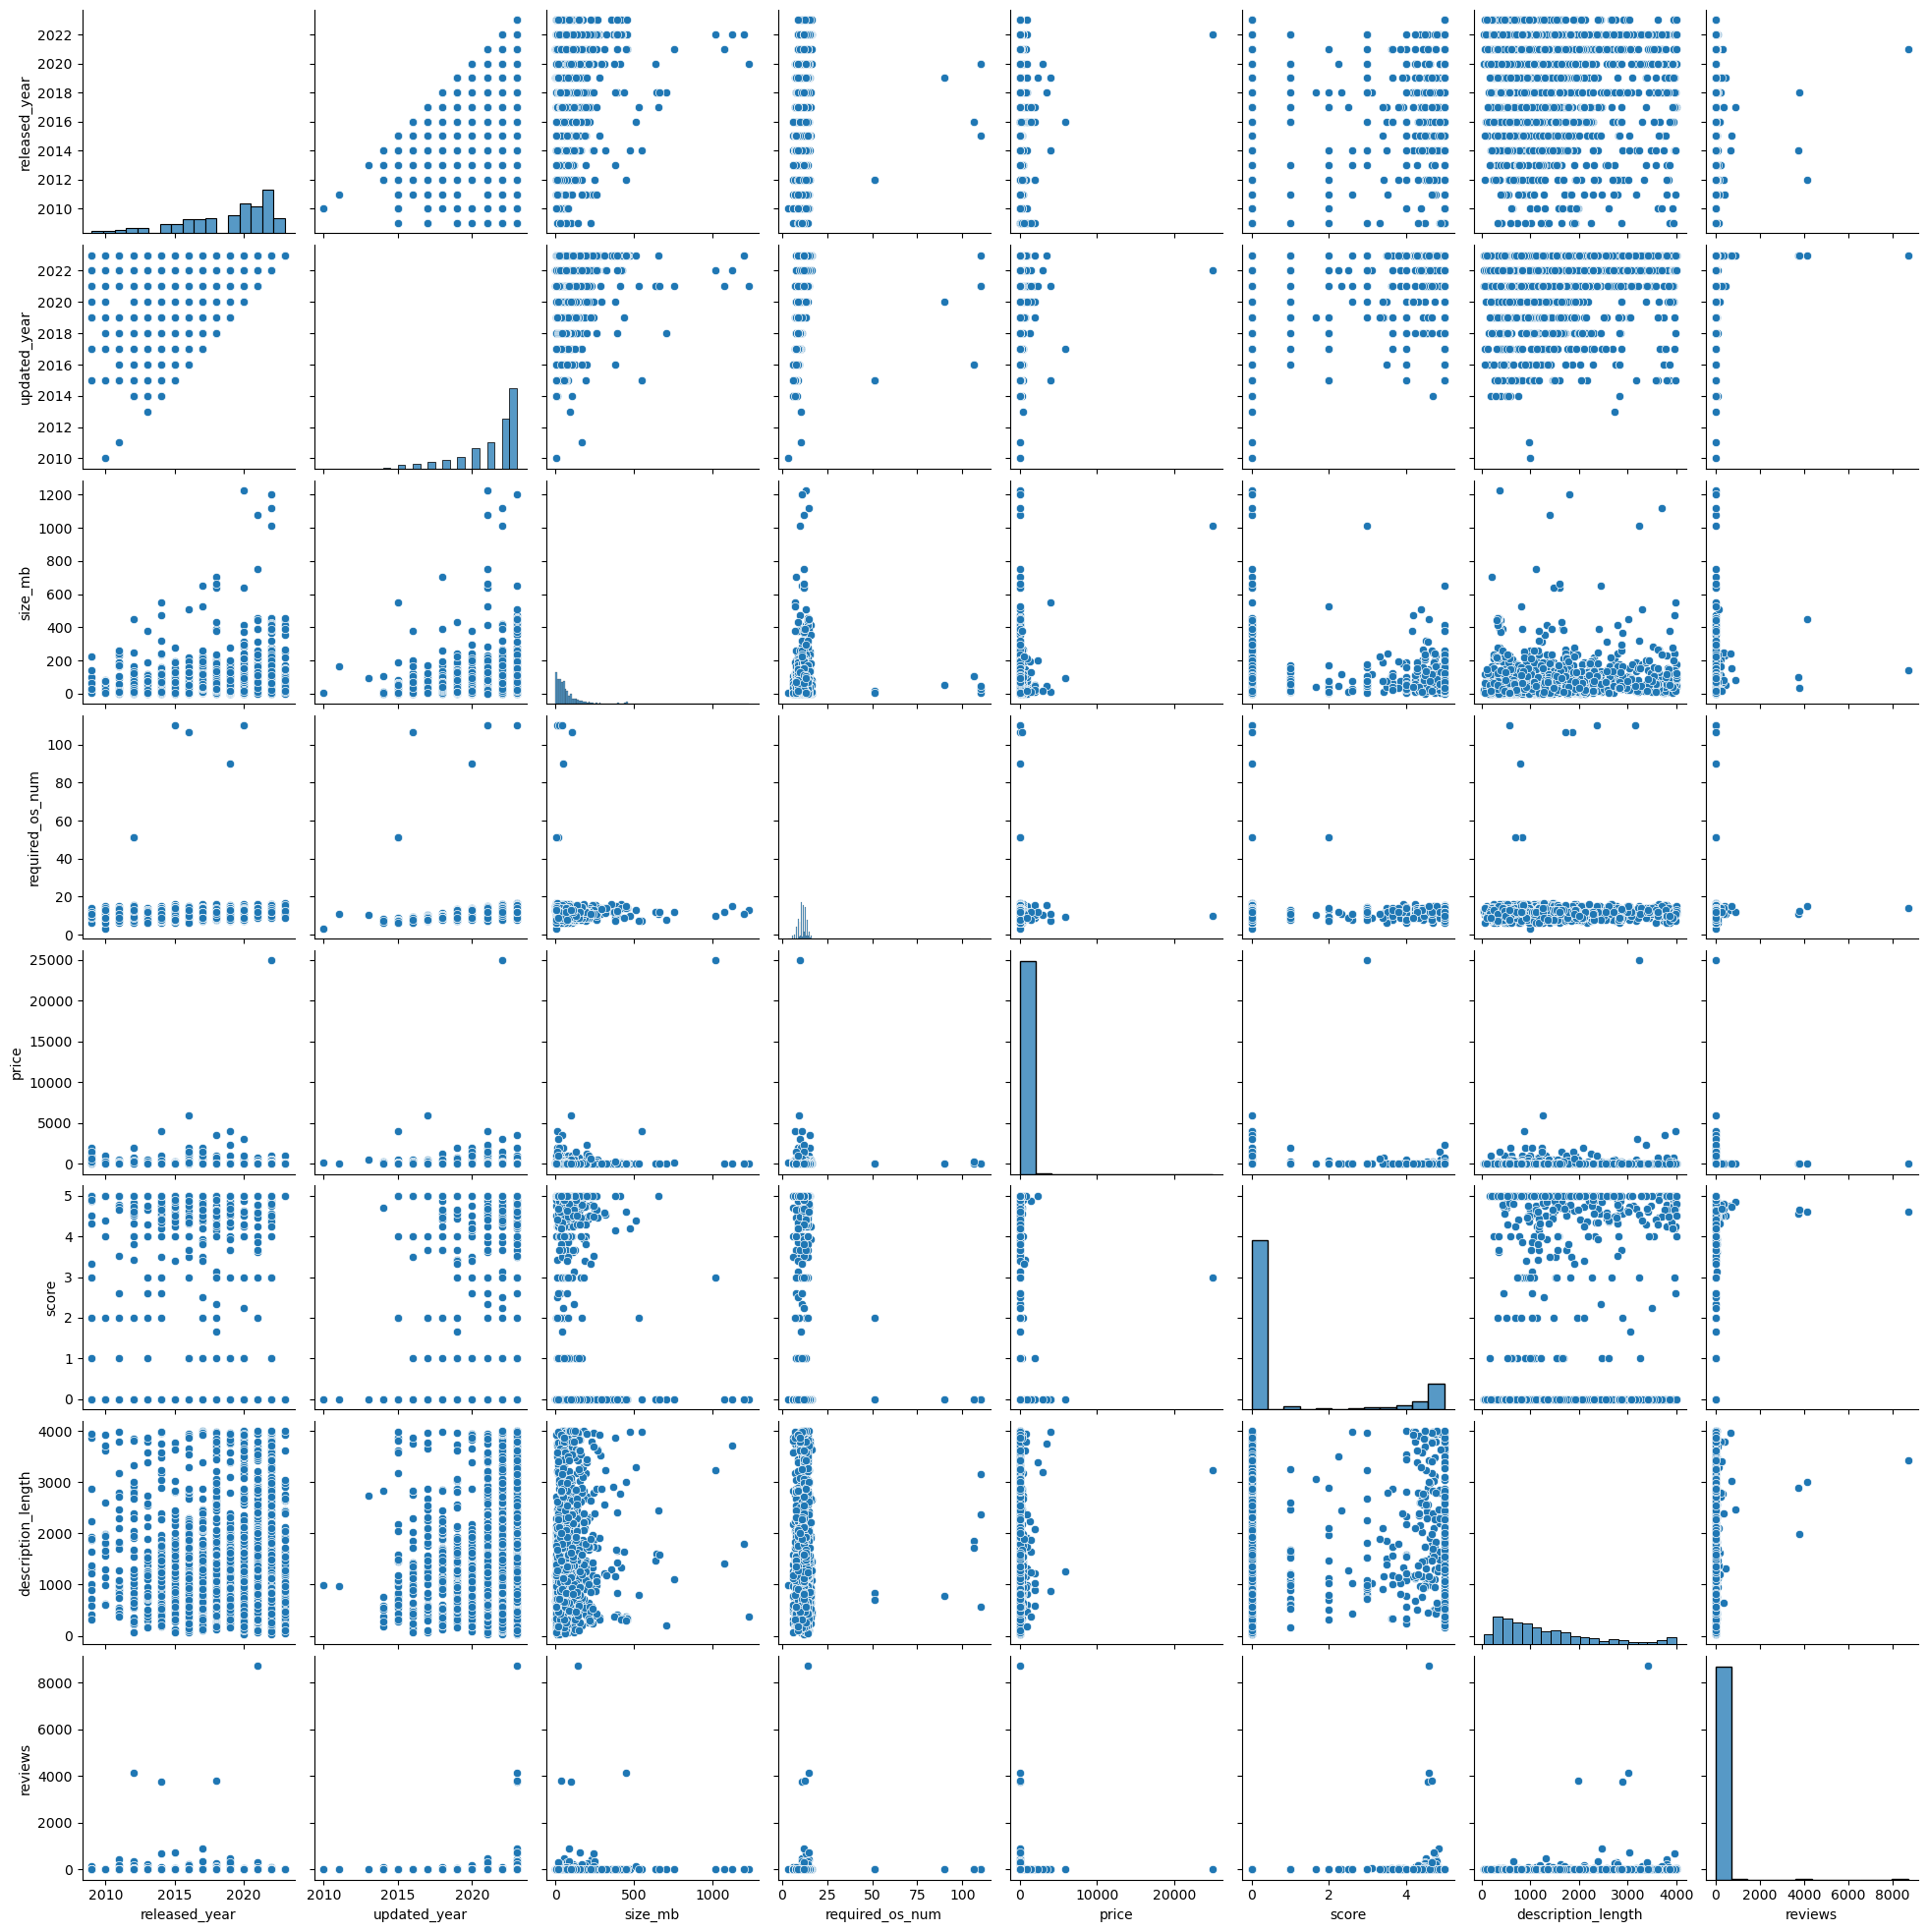

/var/folders/3l/1xf_xmgn11n6d88b01bx4rv00000gn/T/ipykernel_18933/3458017431.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X.corr()


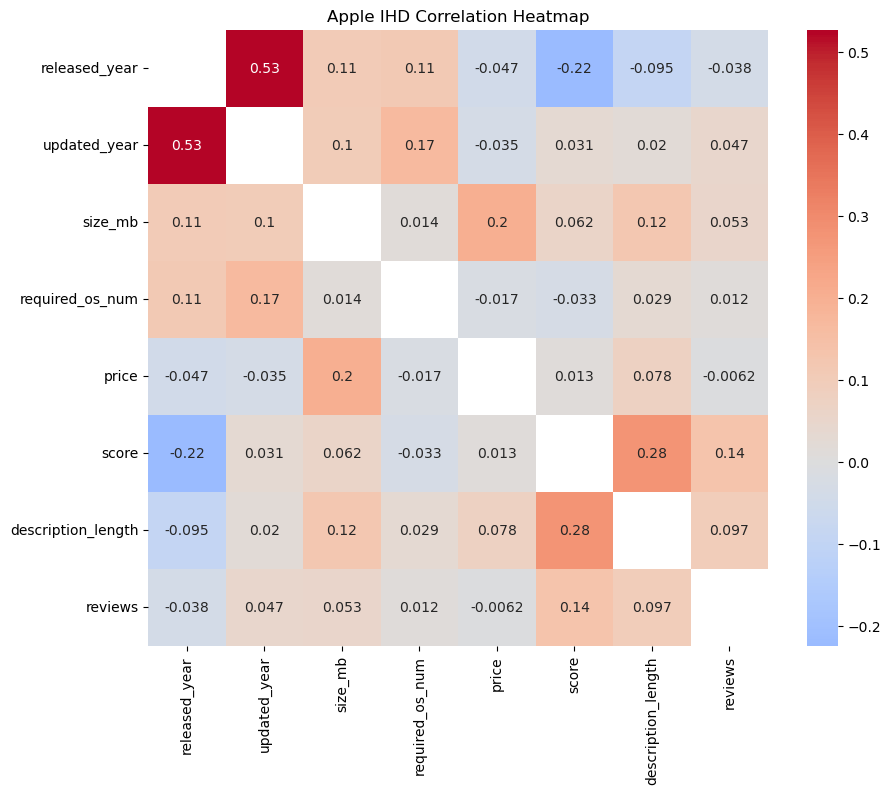

In [9]:
# Specify the independent variables
X = ihd_df[['released_year', 'updated_year', 'size_mb', 'required_os_num', 'price', 'score', 'description_length', 'genres', 'reviews']]

# Pairplot to visualize relationships
sns.pairplot(X)
plt.show()

# Heatmap to visualize correlations with diagonal 1 values replaced
correlation_matrix = X.corr()
np.fill_diagonal(correlation_matrix.values, np.nan)  # Replace diagonal values with NaN
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)  # Center the colormap at 0
plt.title('Apple IHD Correlation Heatmap')
plt.show()

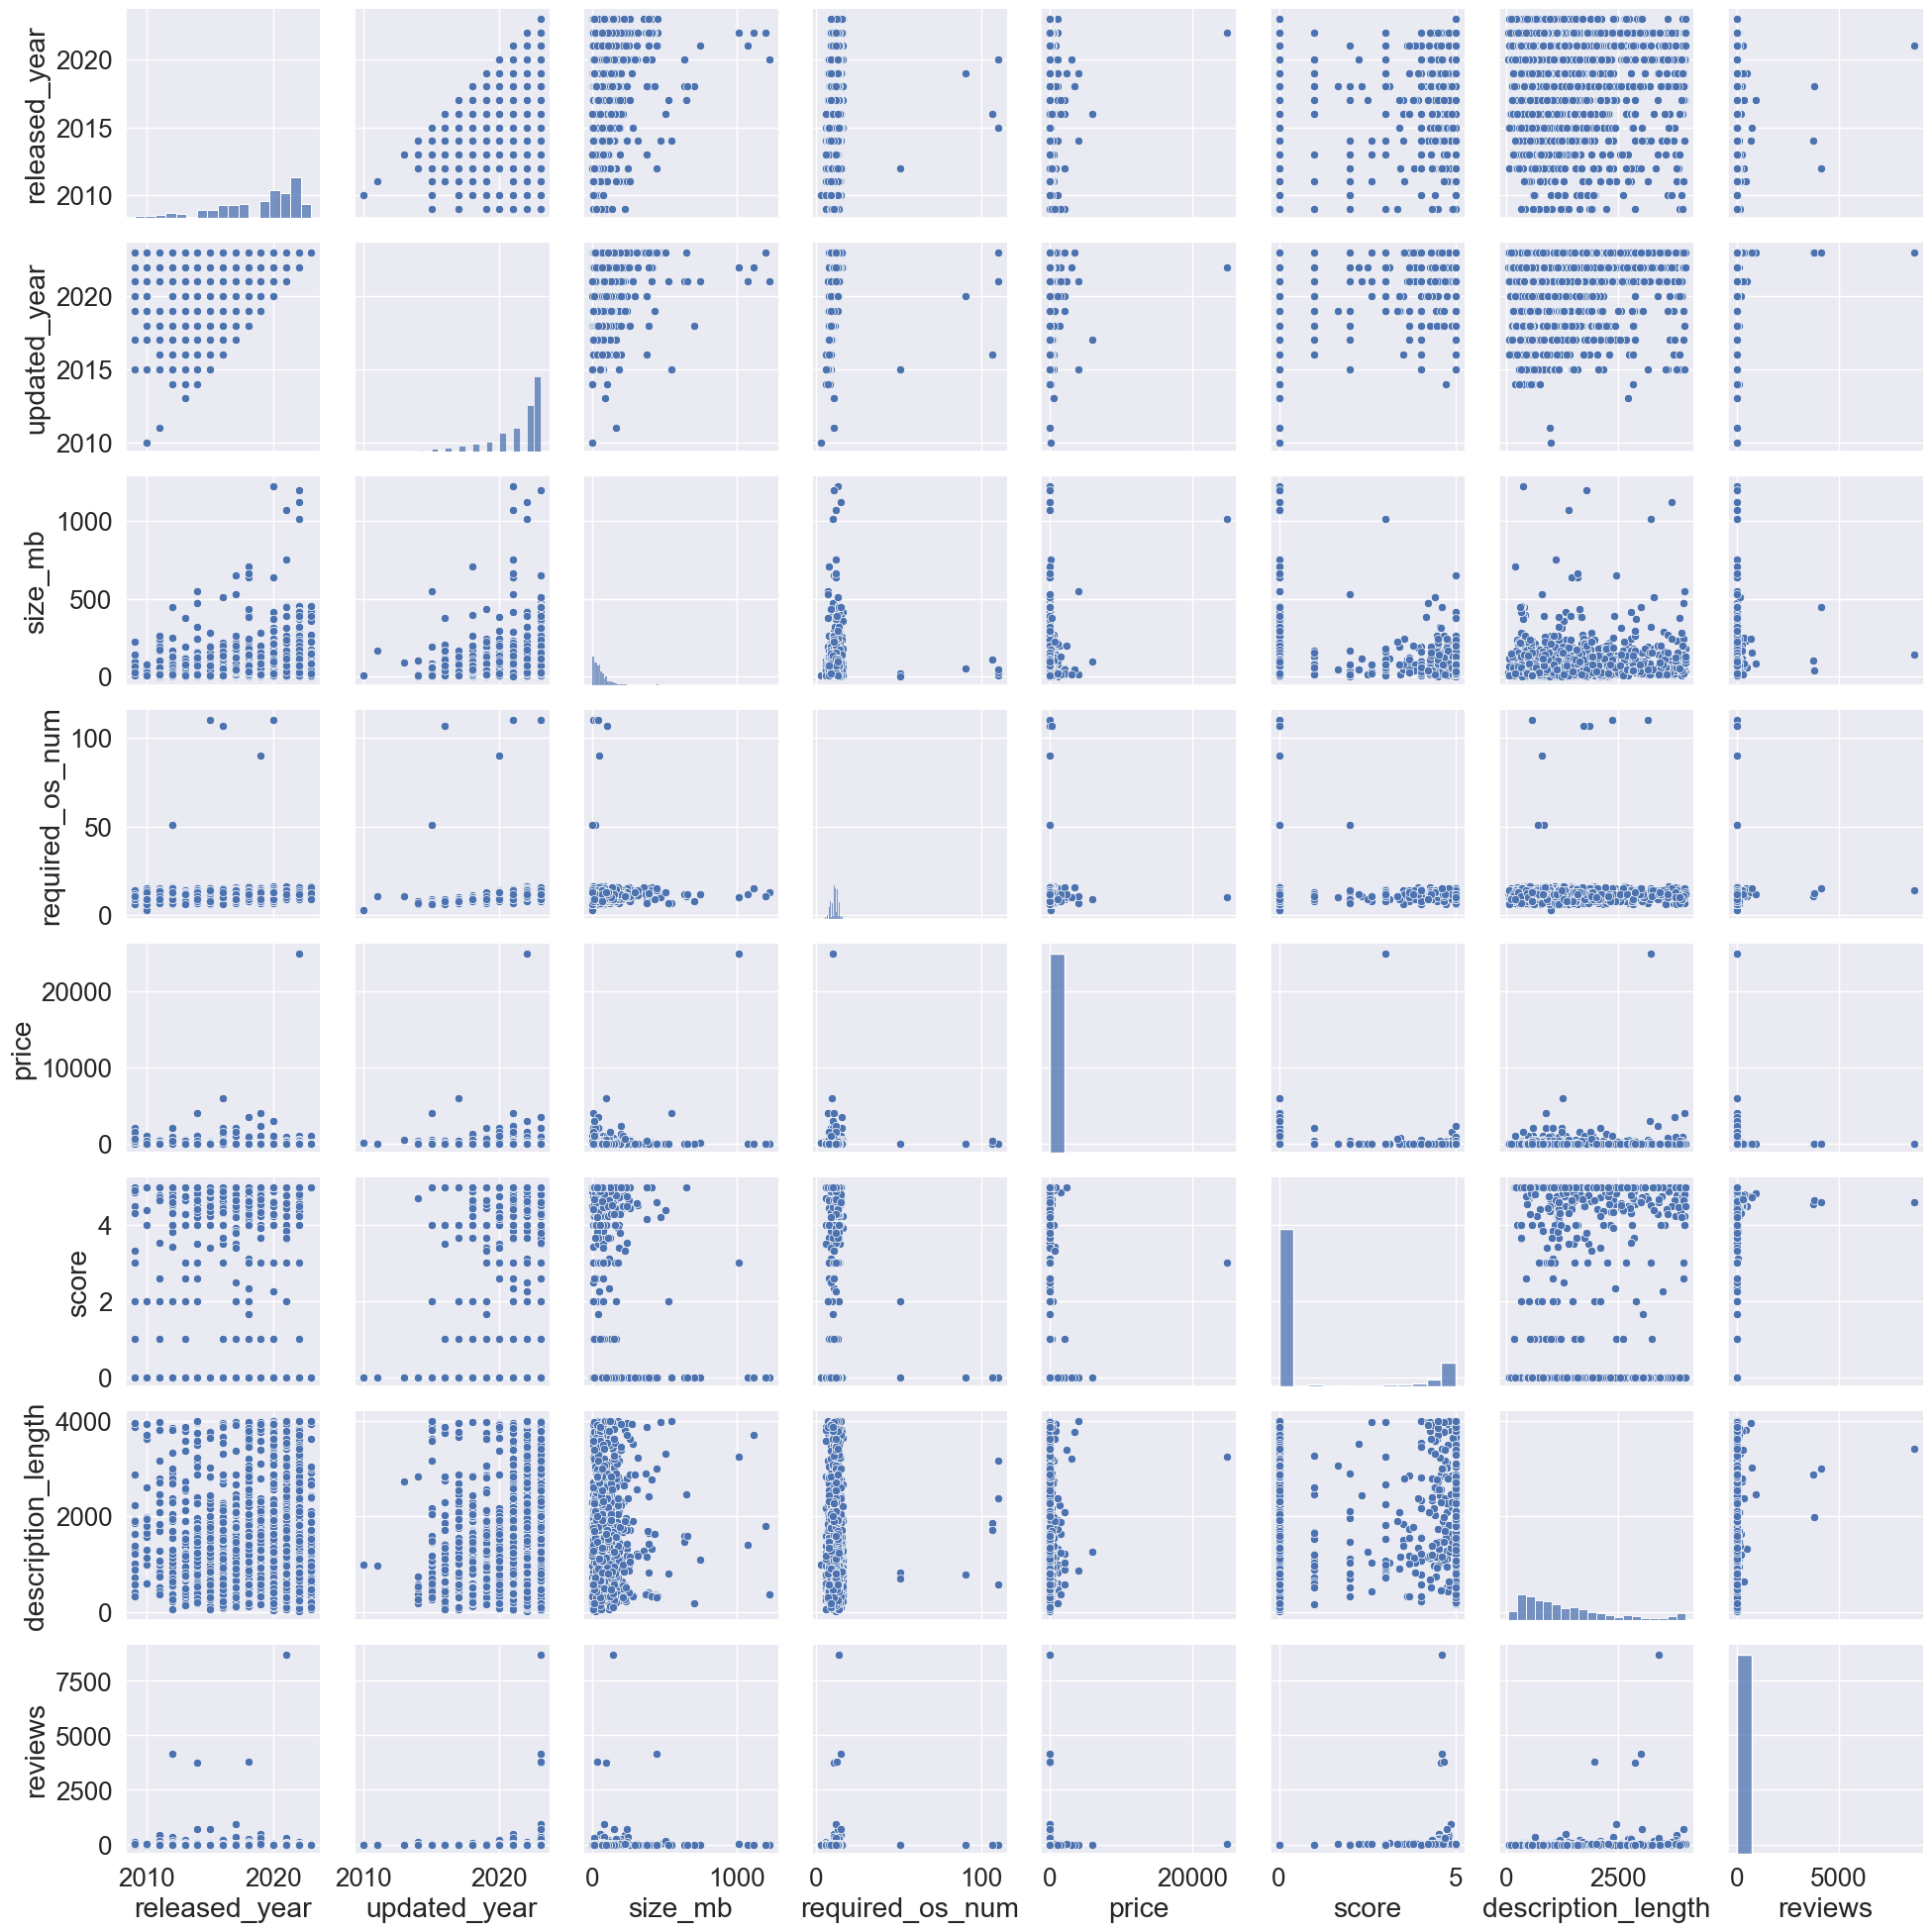

/var/folders/3l/1xf_xmgn11n6d88b01bx4rv00000gn/T/ipykernel_18933/3711477893.py:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X.corr()


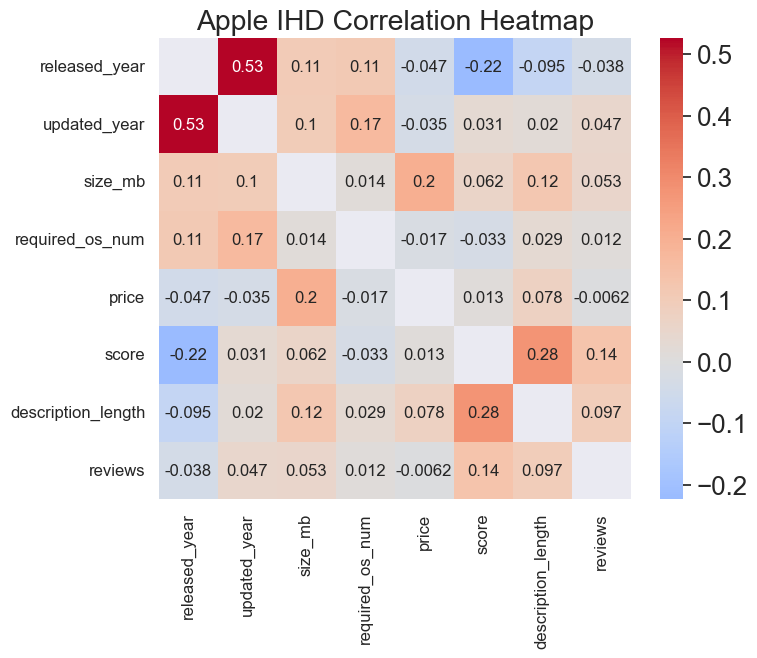

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset and organize columns (if needed)

# Specify the independent variables
X = ihd_df[['released_year', 'updated_year', 'size_mb', 'required_os_num', 'price', 'score', 'description_length', 'genres', 'reviews']]

# Set font size for the entire plot
sns.set(font_scale=1.7)

# Pairplot to visualize relationships
sns.pairplot(X)
plt.show()

# Heatmap to visualize correlations with diagonal 1 values replaced
correlation_matrix = X.corr()
np.fill_diagonal(correlation_matrix.values, np.nan)  # Replace diagonal values with NaN
plt.figure(figsize=(8, 7))

# Set font size for annotations
annot_kws = {"size": 12}

# Create the heatmap
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, annot_kws=annot_kws)

# Modify the tick labels font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title('Apple IHD Correlation Heatmap')
plt.tight_layout()
plt.show()


/var/folders/3l/1xf_xmgn11n6d88b01bx4rv00000gn/T/ipykernel_18933/3267920166.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X.corr()
/var/folders/3l/1xf_xmgn11n6d88b01bx4rv00000gn/T/ipykernel_18933/3267920166.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(correlation_matrix, dtype=np.bool))


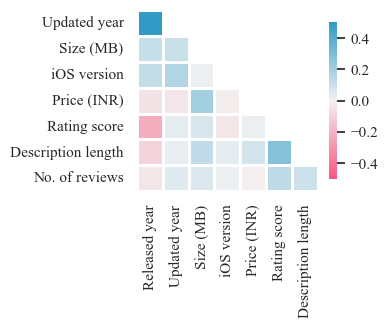

In [42]:
color_palette = ["#f1a340", "#998ec3"]  # Define the color palette here

cm = 1/2.54
X = ihd_df[['released_year', 'updated_year', 'size_mb', 'required_os_num', 'price', 'score', 'description_length', 'genres', 'reviews']]

sns.set(font_scale=1)
sns.set_theme(style='white')
plt.rcParams["font.family"] = "Times New Roman"

correlation_matrix = X.corr()
np.fill_diagonal(correlation_matrix.values, np.nan) 

mask = np.triu(np.ones_like(correlation_matrix, dtype=np.bool))
mask = mask[1:, :-1]
corr = correlation_matrix.iloc[1:,:-1].copy()
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

fig, ax = plt.subplots(figsize=(10*cm, 10*cm))
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, vmin=-0.5, vmax=0.5, 
           linewidth=1, cbar_kws={"shrink": .6})
ax.set_xticklabels(['Released year', 'Updated year', 'Size (MB)', 'iOS version', 'Price (INR)', 'Rating score', 'Description length'])
ax.set_yticklabels(['Updated year', 'Size (MB)', 'iOS version', 'Price (INR)', 'Rating score', 'Description length', 'No. of reviews'])

fig.tight_layout()
fig.savefig("Figure4_apple.pdf", bbox_inches='tight')

In [17]:
correlation_matrix

,released_year,updated_year,size_mb,required_os_num,price,score,description_length,reviews
released_year,NaN,0.526720,0.106793,0.114639,-0.046636,-0.224083,-0.094520,-0.038298
updated_year,0.526720,NaN,0.102192,0.166789,-0.035429,0.031490,0.019838,0.046868
size_mb,0.106793,0.102192,NaN,0.013658,0.202890,0.062253,0.124728,0.053013
required_os_num,0.114639,0.166789,0.013658,NaN,-0.016819,-0.033360,0.028579,0.012251
price,-0.046636,-0.035429,0.202890,-0.016819,NaN,0.012565,0.077510,-0.006212
score,-0.224083,0.031490,0.062253,-0.033360,0.012565,NaN,0.278418,0.135400
description_length,-0.094520,0.019838,0.124728,0.028579,0.077510,0.278418,NaN,0.097167
reviews,-0.038298,0.046868,0.053013,0.012251,-0.006212,0.135400,0.097167,NaN


## Simple descriptive analysis 

### Avg size of apps

Average size of IHD Apps:  76.290644728138 MB


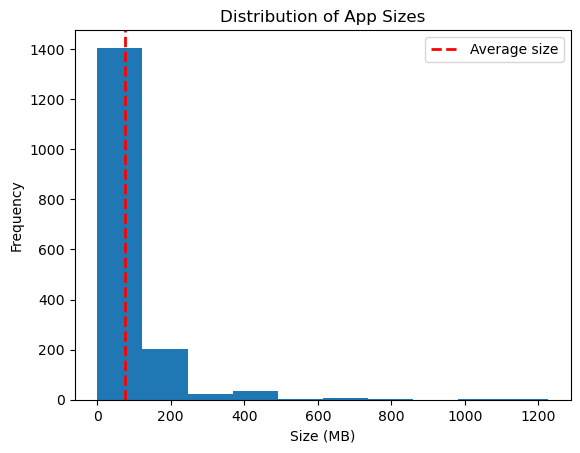

<Figure size 640x480 with 0 Axes>

In [9]:
# Take the average, excluding NaN values
avg_size = np.nanmean(ihd_df['size_mb'])

# Print the average size
print("Average size of IHD Apps: ", avg_size, "MB")

# Plot a histogram
plt.hist(ihd_df['size_mb'].dropna())
plt.xlabel('Size (MB)')
plt.ylabel('Frequency')
plt.title('Distribution of App Sizes')
plt.axvline(avg_size, color='red', linestyle='dashed', linewidth=2, label='Average size')
plt.legend()
plt.show()
plt.savefig('Distribution of IHD App Sizes.png')



## Numebr of reviews

For IHD: 
Percentage of rows with zero values: 79.06%
Percentage of rows with non-zero values: 20.94%
Range of values: 0 - 8712
Average value: 17.932778108268888
Mode: 17.932778108268888
Range 0 - 1: 1329
Range 1 - 10: 256
Range 10 - 100: 70
Range 100 - 1000: 22
Range 1000 - 10000: 4
Range 10000 - 100000: 0


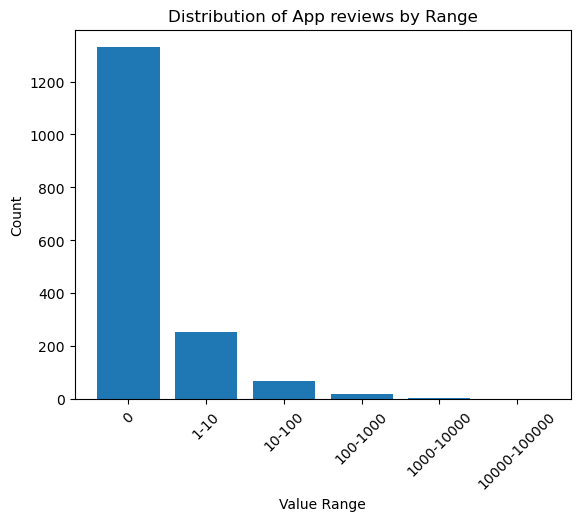

IHD_reviews_range0_1:
                                        id                           title  \
0                   com.BillDirkes.QuickEM                         QuickEM   
1                  com.motusglobal.motusqb                        PULSE QB   
2              com.manuelvicnt.Mindfulness      Present Mind - Mindfulness   
3           Desbrina.Medicine-Tracker-Lite                  Med Track Lite   
4         com.wingluntong.domesticfungshui          Fengshui FortuneTeller   
...                                    ...                             ...   
1676                   com.ewerk.happiness                    I-Positivity   
1677                       com.emedy.EMDDx                           EMDDx   
1678                greenpea.SeniorFitness  Shoulder Exercises For Seniors   
1679  greenpea.BackPainExercisesForSeniors  Low Back Exercises For Seniors   
1680                    nl.vr-lab.vrmobile    ZOLL's Virtual Rescue Mobile   

                  released               

<Figure size 640x480 with 0 Axes>

In [10]:

# Reviews - basic analysis

print("For IHD: ")
# ------------------------------ for df2---------------------------
#import numpy as np
# import math

# Calculate the percentage of rows with zero values
zero_percent = (ihd_df['reviews'] == 0).mean() * 100

# Calculate the percentage of rows with non-zero values
non_zero_percent = (ihd_df['reviews'] != 0).mean() * 100

# Print the results
print(f"Percentage of rows with zero values: {zero_percent:.2f}%")
print(f"Percentage of rows with non-zero values: {non_zero_percent:.2f}%")

# Get the minimum and maximum values, ignoring NaN values
min_value = np.nanmin(ihd_df['reviews'])
max_value = np.nanmax(ihd_df['reviews'])

# Print the range of values
print(f"Range of values: {min_value} - {max_value}")

# Calculate the average of the numeric values, ignoring NaN values
average_value = np.nanmean(ihd_df['reviews'])
# Find the mode
mode_value = np.nanmean(ihd_df['reviews'])

# Print the average value
print(f"Average value: {average_value}")
# Print the mode
print("Mode:", mode_value)

ranges = [0, 1, 10, 100, 1000, 10000, 100000]

# Compute the histogram
hist, bin_edges = np.histogram(ihd_df['reviews'], bins=ranges)

# Print the histogram counts for each range
for i in range(len(hist)):
    print(f"Range {bin_edges[i]} - {bin_edges[i+1]}: {hist[i]}")

# # Find the rows in the range 10000-100000
# rows_in_range = df[(df['price'] >= 10000) & (df['price'] <= 100000)]

# # Print the rows in the range
# print(rows_in_range)

# Plot the histogram as a bar plot
tick_labels = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])}" if i > 0 else '0' for i in range(len(hist))] # this and the line below keeps the first x value in plot as '0' instead of 0-1
plt.bar(range(len(hist)), hist, tick_label=tick_labels)
plt.xlabel('Value Range')
plt.ylabel('Count')
plt.title('Distribution of App reviews by Range')
# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45)
# Show the plot
plt.show()
# Adjust plot layout for better visualization
plt.tight_layout()

#============================================
# For IHD: 
# Percentage of rows with zero values: 77.36%
# Percentage of rows with non-zero values: 22.64%
# Range of values: 0.0 - 493098.0
# Average value: 186.19139582352017
# Mode: 186.19139582352017
# Range 0 - 1: 4988
# Range 1 - 10: 671
# Range 10 - 100: 508
# Range 100 - 1000: 156
# Range 1000 - 10000: 36
# Range 10000 - 100000: 7

# Create separate dataframes for each reviews range
IHD_reviews_range0_1 = ihd_df[ihd_df['reviews'].between(0, 1)]
IHD_reviews_range1_10 = ihd_df[ihd_df['reviews'].between(1, 10)]
IHD_reviews_range10_100 = ihd_df[ihd_df['reviews'].between(10, 100)]
IHD_reviews_range100_1000 = ihd_df[ihd_df['reviews'].between(100, 1000)]
IHD_reviews_range1000_10000 = ihd_df[ihd_df['reviews'].between(1000, 10000)]
IHD_reviews_range10000_100000 = ihd_df[ihd_df['reviews'].between(10000, 100000)]

# Print the dataframes
print("IHD_reviews_range0_1:")
print(IHD_reviews_range0_1)
print()

print("IHD_reviews_range1_10:")
print(IHD_reviews_range1_10)
print()

print("IHD_reviews_range10_100:")
print(IHD_reviews_range10_100)
print()

print("IHD_reviews_range100_1000:")
print(IHD_reviews_range100_1000)
print()

print("IHD_reviews_range1000_10000:")
print(IHD_reviews_range1000_10000)
print()

print("IHD_reviews_range10000_100000:")
print(IHD_reviews_range10000_100000)
print()



### scores averages

For IHD: 
Range of values: 0.0 - 5.0
Average value: 0.8932665437239738
Mode: 0.8932665437239738


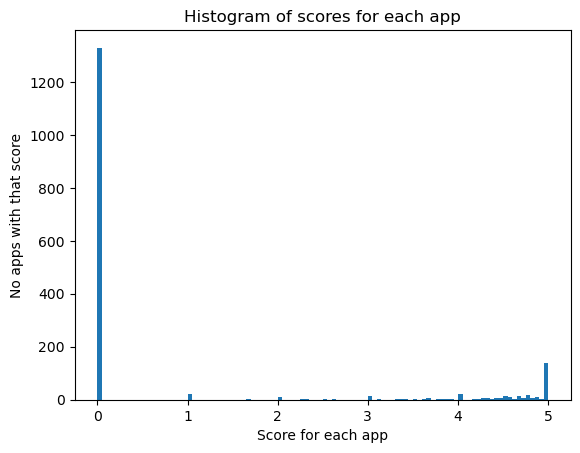

1329
Range 0 - 1: 1329
Range 1 - 2: 21
Range 2 - 3: 16
Range 3 - 4: 37
Range 4 - 5: 278


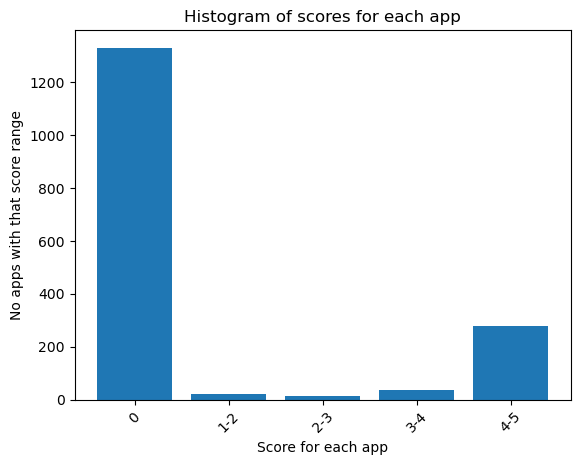

<Figure size 640x480 with 0 Axes>

In [11]:

print("For IHD: ")
#import numpy as np

# df = final_screened_IHD

# Get the minimum and maximum values, ignoring NaN values
min_value = np.nanmin(ihd_df['score'])
max_value = np.nanmax(ihd_df['score'])

# Print the range of values
print(f"Range of values: {min_value} - {max_value}")

# Calculate the average of the numeric values, ignoring NaN values
average_value = np.nanmean(ihd_df['score'])
# Find the mode
mode_value = np.nanmean(ihd_df['score'])

# Print the average value
print(f"Average value: {average_value}")
# Print the mode
print("Mode:", mode_value)

# Plot the histogram
plt.hist(ihd_df['score'], bins=100)  # Adjust the number of bins as needed
plt.ticklabel_format(style='plain')

# Add labels and title
plt.xlabel('Score for each app')
plt.ylabel('No apps with that score')
plt.title('Histogram of scores for each app')

# Show the plot
plt.show()

# For df2: 
# Range of values: 0.0 - 5.0
# Average value: 0.9591326138736265
# Mode: 0.9591326138736265

#-----------------------------

#The above plot gave the number of ratings across the apps. Now we want to see their distribution

zero_count = len(ihd_df[ihd_df['score'] == 0])
print(zero_count)

ranges = [0, 1, 2, 3, 4, 5]

# Compute the histogram
hist, bin_edges = np.histogram(ihd_df['score'], bins=ranges)

# Print the histogram counts for each range
for i in range(len(hist)):
    print(f"Range {bin_edges[i]} - {bin_edges[i+1]}: {hist[i]}")

# Plot the histogram as a bar plot
tick_labels = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])}" if i > 0 else '0' for i in range(len(hist))]
plt.bar(range(len(hist)), hist, tick_label=tick_labels)
# Add labels and title
plt.xlabel('Score for each app')
plt.ylabel('No apps with that score range')
plt.title('Histogram of scores for each app')
# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45)
# Show the plot
plt.show()
# Adjust plot layout for better visualization
plt.tight_layout()

# =============Results==================
# For IHD: 
# Range of values: 0.0 - 5.0
# Average value: 0.9343556950541686
# Mode: 0.9343556950541686
# 4948 apps have 0 as the score for rating
# these are probably the same ones with out any ratings. We will compare these apps for  their number of installs # Futher analysis

# Range 0.0 - 0.01: 4948
# Range 0.01 - 1.0: 0
# Range 1.0 - 2.0: 7
# Range 2.0 - 3.0: 55
# Range 3.0 - 4.0: 383
# Range 4.0 - 5.0: 976 - There are alot of apps with a good rating score

### App prices

For IHD: 
Percentage of rows with zero values: 88.99%
Percentage of rows with non-zero values: 11.01%
Range of values: 0 - 24900
Average value: 69.4330755502677
Mode: 69.4330755502677
Range 0 - 1: 1496
Range 1 - 100: 53
Range 100 - 1000: 115
Range 1000 - 10000: 16
Range 10000 - 100000: 1


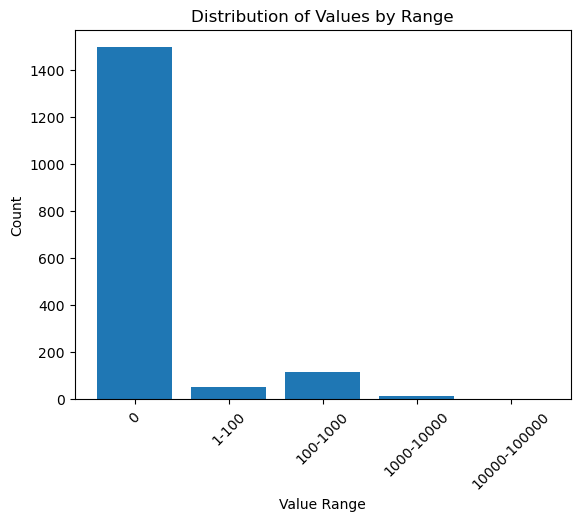

IHD_price_range0_1:
                                        id                           title  \
1                  com.motusglobal.motusqb                        PULSE QB   
2              com.manuelvicnt.Mindfulness      Present Mind - Mindfulness   
3           Desbrina.Medicine-Tracker-Lite                  Med Track Lite   
4         com.wingluntong.domesticfungshui          Fengshui FortuneTeller   
6                          com.nurokor.dna               KorDNA by NuroKor   
...                                    ...                             ...   
1675               com.enproinc.inspectaed                      InspectAED   
1676                   com.ewerk.happiness                    I-Positivity   
1678                greenpea.SeniorFitness  Shoulder Exercises For Seniors   
1679  greenpea.BackPainExercisesForSeniors  Low Back Exercises For Seniors   
1680                    nl.vr-lab.vrmobile    ZOLL's Virtual Rescue Mobile   

                  released               up

<Figure size 640x480 with 0 Axes>

In [12]:
print("For IHD: ")
# ------------------------------ for df2---------------------------
#import numpy as np
# import math

# Calculate the percentage of rows with zero values
zero_percent = (ihd_df['price'] == 0).mean() * 100

# Calculate the percentage of rows with non-zero values
non_zero_percent = (ihd_df['price'] != 0).mean() * 100

# Print the results
print(f"Percentage of rows with zero values: {zero_percent:.2f}%")
print(f"Percentage of rows with non-zero values: {non_zero_percent:.2f}%")

# Get the minimum and maximum values, ignoring NaN values
min_value = np.nanmin(ihd_df['price'])
max_value = np.nanmax(ihd_df['price'])

# Print the range of values
print(f"Range of values: {min_value} - {max_value}")

# Calculate the average of the numeric values, ignoring NaN values
average_value = np.nanmean(ihd_df['price'])
# Find the mode
mode_value = np.nanmean(ihd_df['price'])

# Print the average value
print(f"Average value: {average_value}")
# Print the mode
print("Mode:", mode_value)

ranges = [0, 1, 100, 1000, 10000, 100000]

# Compute the histogram
hist, bin_edges = np.histogram(ihd_df['price'], bins=ranges)

# Print the histogram counts for each range
for i in range(len(hist)):
    print(f"Range {bin_edges[i]} - {bin_edges[i+1]}: {hist[i]}")


# Plot the histogram as a bar plot
tick_labels = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])}" if i > 0 else '0' for i in range(len(hist))] # this and the line below keeps the first x value in plot as '0' instead of 0-1
plt.bar(range(len(hist)), hist, tick_label=tick_labels)
plt.xlabel('Value Range')
plt.ylabel('Count')
plt.title('Distribution of Values by Range')
# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45)
# Show the plot
plt.show()
# Adjust plot layout for better visualization
plt.tight_layout()

# ======================Results===============
# Range 0 - 1: 6012
# Range 1 - 100: 62
# Range 100 - 1000: 315
# Range 1000 - 10000: 50
# Range 10000 - 100000: 9

# Most apps are free of charge, an those who have price are in the range - 100-1000. this is a good df for # further analysis

# Create separate dataframes for each price range
IHD_price_range0_1 = ihd_df[ihd_df['price'].between(0, 1)]
IHD_price_range1_100 = ihd_df[ihd_df['price'].between(1, 100)]
IHD_price_range100_1000 = ihd_df[ihd_df['price'].between(100, 1000)]
IHD_price_range1000_10000 = ihd_df[ihd_df['price'].between(1000, 10000)]
IHD_price_range10000_100000 = ihd_df[ihd_df['price'].between(10000, 100000)]

# Print the dataframes
print("IHD_price_range0_1:")
print(IHD_price_range0_1)
print()

print("IHD_price_range1_100:")
print(IHD_price_range1_100)
print()

print("IHD_price_range100_1000:")
print(IHD_price_range100_1000)
print()

print("IHD_price_range1000_10000:")
print(IHD_price_range1000_10000)
print()

print("IHD_price_range10000_100000:")
print(IHD_price_range10000_100000)
print()


In [13]:
IHD_price_range10000_100000

,id,title,released,updated,required_os,required_os_2021,size,size_2021,score,score_2021,...,price_2021,currency,description,description_length,required_os.1,disease,required_os_num,released_year,updated_year,size_mb
334,com.mcGrawHill.harrisons21,Harrison’s Internal Med. 21/E,2022-07-28T07:00:00Z,2022-10-23T21:53:54Z,10.0,NaN,1014387712,NaN,3.0,NaN,...,NaN,INR,The Voice of Clinical Reason\n\nHarrison’s Pri...,3239,10.0,IHD,10.0,2022,2022,1014.387712


[  499     0   999   199    99   299   399  1999   699 24900   799  1499
  5900  1299  3999  3499  2999  2299   599]


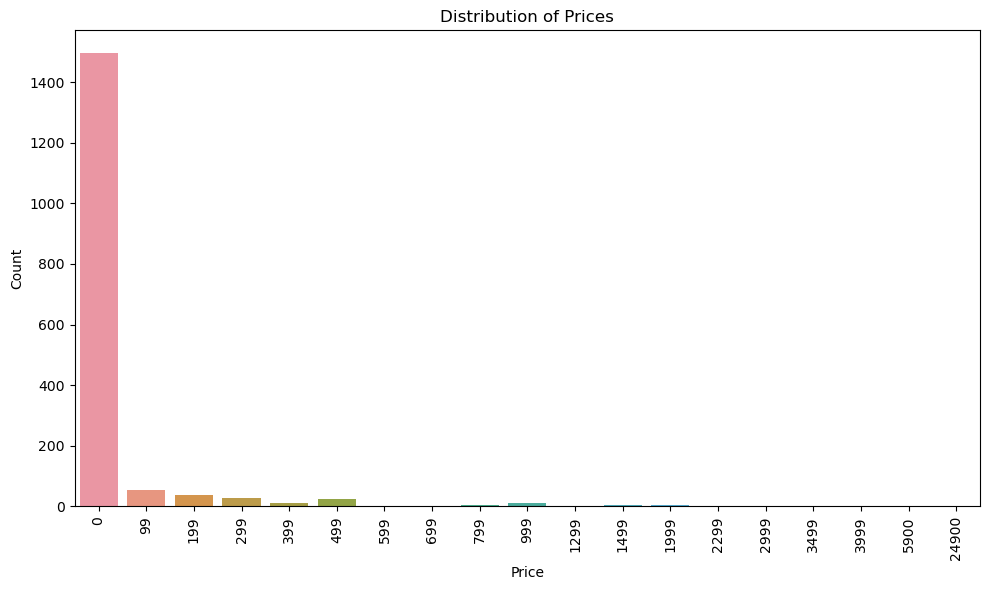

In [14]:
# Get all unique values in the 'Column1' column
unique_values = ihd_df['price'].unique()

print(unique_values)
### All app prices are in INR
### These are the unique price values
# [  499     0   999   199    99   299   399  1999   699 24900   799  1499
#   5900  3999  2299]
#ANother price graph
import seaborn as sns

# Get the unique values and their counts in the "price" column
price_counts = ihd_df['price'].value_counts()

# Sort the unique values in ascending order
sorted_prices = price_counts.index.sort_values(ascending=True)

# Create a bar plot of prices and their counts
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_prices, y=price_counts[sorted_prices])
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Prices')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Description length

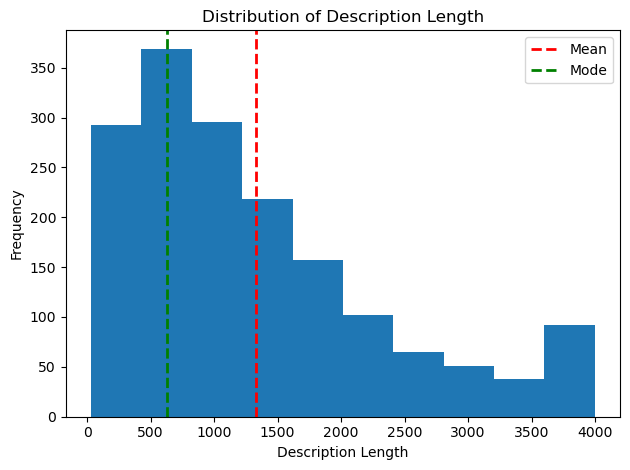

In [15]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
from scipy.stats import mode

# Calculate the average description length
avg_description_length = np.nanmean(ihd_df['description_length'])

# Calculate the mode
bin_counts = np.bincount(ihd_df['description_length'].dropna())
mode_description_length = np.argmax(bin_counts)

# Plot a histogram
plt.hist(ihd_df['description_length'].dropna(), bins=10)
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.title('Distribution of Description Length')

# Plot vertical lines for mode and mean
plt.axvline(avg_description_length, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mode_description_length, color='green', linestyle='dashed', linewidth=2, label='Mode')

plt.legend()
plt.tight_layout()
plt.show()


## required_os_num

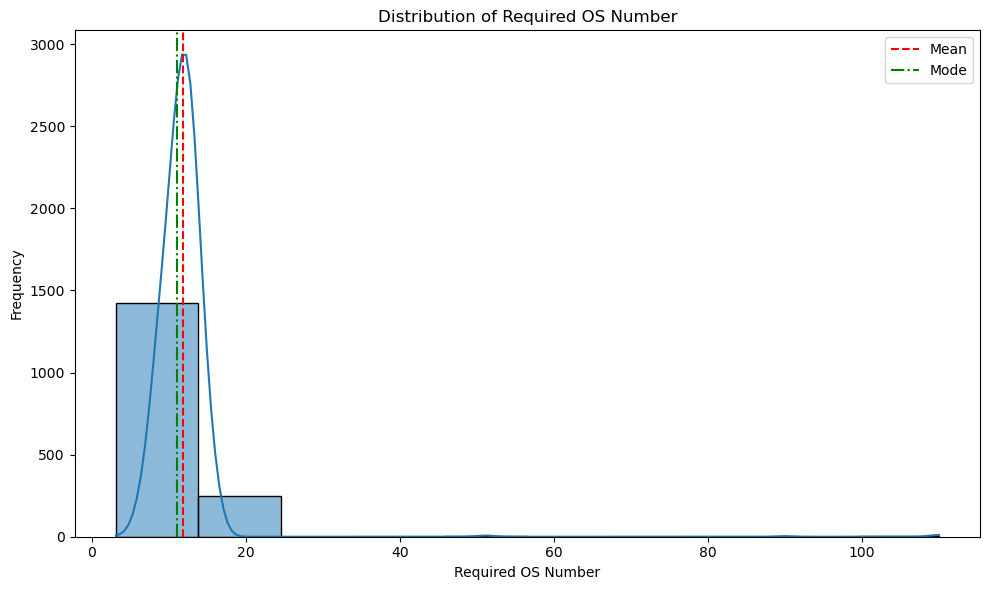

In [16]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# Filter out the unwanted value (106.6)
filtered_df = ihd_df[ihd_df['required_os_num'] != 106.6]

# Calculate mean and mode
mean_value = filtered_df['required_os_num'].mean()
mode_value = filtered_df['required_os_num'].mode().values[0]

# Create a bar plot of the distribution
plt.figure(figsize=(10, 6))

sns.histplot(data=filtered_df, x='required_os_num', bins=10, kde=True)
plt.axvline(x=mean_value, color='r', linestyle='--', label='Mean')
plt.axvline(x=mode_value, color='g', linestyle='-.', label='Mode')
plt.xlabel('Required OS Number')
plt.ylabel('Frequency')
plt.title('Distribution of Required OS Number')
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
ihd_df['required_os']

0       13.0
1       10.0
2       14.3
3       10.3
4       13.0
        ... 
1676     8.0
1677     9.0
1678    13.0
1679    13.0
1680    12.0
Name: required_os, Length: 1681, dtype: object

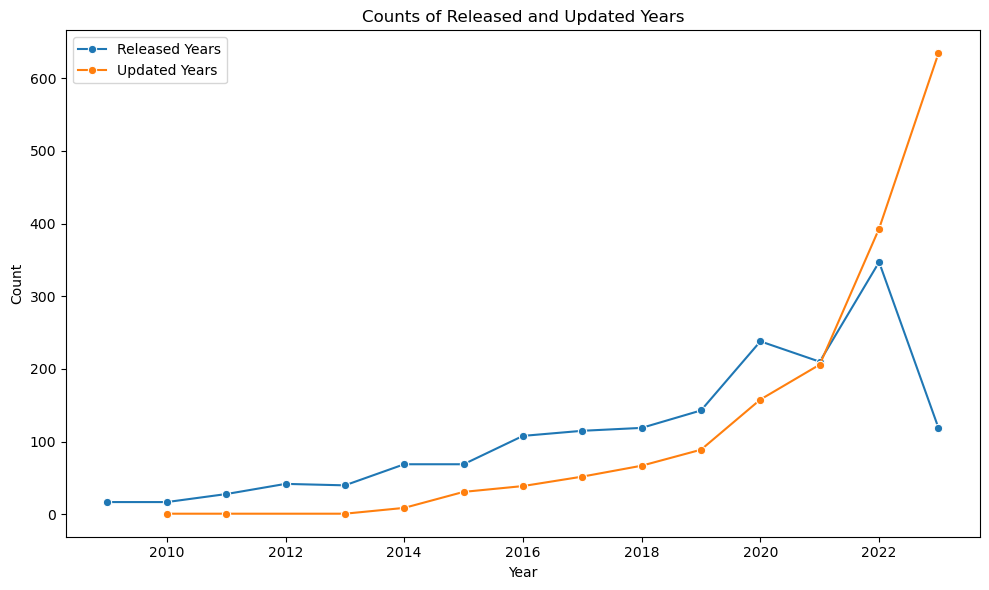

In [18]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns


# Count the occurrences of each year in the "released_year" and "updated_year" columns
released_counts = ihd_df['released_year'].value_counts().sort_index()
updated_counts = ihd_df['updated_year'].value_counts().sort_index()

# Create a line plot for released years and updated years
plt.figure(figsize=(10, 6))

# Plot released years
sns.lineplot(data=released_counts, marker='o', label='Released Years')

# Plot updated years
sns.lineplot(data=updated_counts, marker='o', label='Updated Years')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of Released and Updated Years')
plt.legend()  # Display legend

plt.tight_layout()
plt.show()
